**Cell 1**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

import glob

import os
from sklearn.model_selection import train_test_split
import shutil

**Cell 2**

In [4]:
print('There are {} images of cats in the dataset'.format(len(glob.glob('C:/Users/Gaurav Kharel/Desktop/Spring 2023/Machine Learning/Final_Project_CNN/PetImages/Cat/*jpg'))))
print('There are {} images of dogs in the dataset'.format(len(glob.glob('C:/Users/Gaurav Kharel/Desktop/Spring 2023/Machine Learning/Final_Project_CNN/PetImages/Dog/*jpg'))))
print('There are {} images of birds in the dataset'.format(len(glob.glob('C:/Users/Gaurav Kharel/Desktop/Spring 2023/Machine Learning/Final_Project_CNN/PetImages/Bird/*jpg'))))

There are 12505 images of cats in the dataset
There are 12499 images of dogs in the dataset
There are 11788 images of birds in the dataset


**Cell 3**

In [5]:
# Do not start and break thread when stepping and breaking

# The path to my cats dataset folder
dataset_path_cats = "C:/Users/Gaurav Kharel/Desktop/Spring 2023/Machine Learning/Final_Project_CNN/PetImages/Cat"

# The path to my dogs dataset folder
dataset_path_dogs = "C:/Users/Gaurav Kharel/Desktop/Spring 2023/Machine Learning/Final_Project_CNN/PetImages/Dog"

# The path to birts dataset folder

dataset_path_birds = "C:/Users/Gaurav Kharel/Desktop/Spring 2023/Machine Learning/Final_Project_CNN/PetImages/Bird"


# The path to my output folder
output_path = "C:/Users/Gaurav Kharel/Desktop/Spring 2023/Machine Learning/Final_Project_CNN/PetImages_Split"

# defining the train, validation, and test ratio
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1


**Cell 4**

In [6]:
for dataset_path, animal in [(dataset_path_cats, "cats"), (dataset_path_dogs, "dogs"), (dataset_path_birds, "birds")]:
    # getting the list of all image files in the dataset folder for the animal
    image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(".jpg")]

    # splitting the dataset into training, validation, and test sets for the animal
    train_files, testval_files = train_test_split(image_files, train_size=train_ratio, random_state=42)
    val_files, test_files = train_test_split(testval_files, train_size=val_ratio/(val_ratio+test_ratio), random_state=42)

    # creating the output directories for the animal
    os.makedirs(os.path.join(output_path, "train", animal), exist_ok=True)
    os.makedirs(os.path.join(output_path, "val", animal), exist_ok=True)
    os.makedirs(os.path.join(output_path, "test", animal), exist_ok=True)

    # copying the training set to the output folder
    for file in train_files:
        shutil.copy(file, os.path.join(output_path, "train", animal, os.path.basename(file)))

    # copying the validation set to the output folder
    for file in val_files:
        shutil.copy(file, os.path.join(output_path, "val", animal, os.path.basename(file)))

    # copying the test set to the output folder
    for file in test_files:
        shutil.copy(file, os.path.join(output_path, "test", animal, os.path.basename(file)))

**Cell 5**

In [7]:
#batch 50
model = keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),   # Addding one more for comparasion
    Flatten(),
    Dense(64, activation='relu'),           # Two fully connected layers
    Dense(3, activation='softmax')
])

**Cell 6**

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(os.path.join(output_path, "train"), 
                                                    target_size=(128, 128), 
                                                    batch_size=50, 
                                                    class_mode='categorical',
                                                    shuffle=True)

test_generator = test_datagen.flow_from_directory(os.path.join(output_path, "test"), 
                                                  target_size=(128, 128), 
                                                  batch_size=50, 
                                                  class_mode='categorical',
                                                  shuffle=True)

validation_generator = train_datagen.flow_from_directory(os.path.join(output_path, "val"), 
                                                        target_size=(128, 128), 
                                                        batch_size=50, 
                                                        class_mode='categorical',
                                                        shuffle=True)


Found 31240 images belonging to 3 classes.
Found 4867 images belonging to 3 classes.
Found 4851 images belonging to 3 classes.


**Cell 7**

In [10]:

from PIL import Image
import os

for root, dirs, files in os.walk(output_path):
    for file in files:
        try:
            Image.open(os.path.join(root, file))
        except Exception as e:
            print(f"Error opening {file}: {e}")

c:\Users\Gaurav Kharel\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


**Cell 8**

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, 
                    validation_data=validation_generator)

Epoch 1/10
625/625 [==============================] - 594s 948ms/step - loss: 0.8765 - accuracy: 0.5534 - val_loss: 0.8206 - val_accuracy: 0.5972
Epoch 2/10
625/625 [==============================] - 603s 964ms/step - loss: 0.7193 - accuracy: 0.6554 - val_loss: 0.6508 - val_accuracy: 0.7019
Epoch 3/10
625/625 [==============================] - 620s 991ms/step - loss: 0.6395 - accuracy: 0.7082 - val_loss: 0.6119 - val_accuracy: 0.7293
Epoch 4/10
625/625 [==============================] - 608s 973ms/step - loss: 0.5713 - accuracy: 0.7474 - val_loss: 0.4941 - val_accuracy: 0.7831
Epoch 5/10
625/625 [==============================] - 607s 971ms/step - loss: 0.5279 - accuracy: 0.7681 - val_loss: 0.5179 - val_accuracy: 0.7763
Epoch 6/10
625/625 [==============================] - 768s 1s/step - loss: 0.4804 - accuracy: 0.7935 - val_loss: 0.4513 - val_accuracy: 0.8089
Epoch 7/10
625/625 [==============================] - 658s 1s/step - loss: 0.4375 - accuracy: 0.8165 - val_loss: 0.4039 - val_a

**Cell 9**

98/98 - 18s - loss: 0.3021 - accuracy: 0.8812 - 18s/epoch - 179ms/step


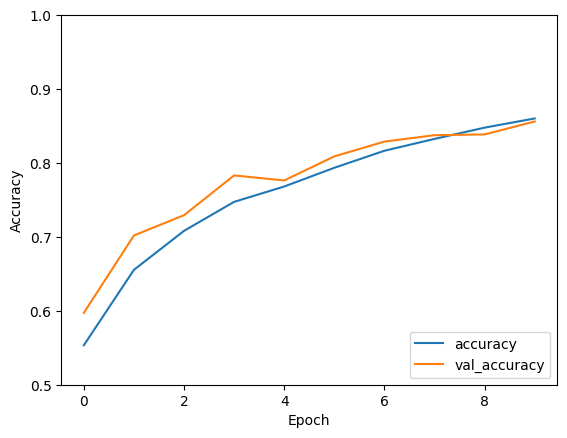

In [14]:
# Evaluating the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)


**Cell 10**

In [15]:
print(test_acc)

0.8812410235404968
